## 2. 
Compare the results of calculating $f(500)$ and $g(500)$ using six digits and rounding. The functions are
$$
f(x)=x(\sqrt{x+1}-\sqrt{x}) \quad \text { and } \quad g(x)=\frac{x}{\sqrt{x+1}+\sqrt{x}}
$$

In [6]:
import math
import matplotlib.pyplot as plt

In [3]:
def f(x):
    return x * (math.sqrt(x + 1) - math.sqrt(x))

def g(x):
    return x / (math.sqrt(x + 1) + math.sqrt(x))

# Calculate f(500) and g(500) with six digits and rounding
x_value = 500
f_result = round(f(x_value), 6)
g_result = round(g(x_value), 6)

# Print the results
print("f(500):", f_result)
print("g(500):", g_result)


f(500): 11.174755
g(500): 11.174755


## 3. 
Compare the results of calculating $f(0.01)$ and $P(0.01)$ using six digits and rounding
$$
f(x)=\frac{\exp x-1-x}{x^2} \quad \text { and } \quad P(x)=\frac{1}{2}+\frac{x}{6}+\frac{x^2}{24}
$$


In [4]:
def f(x):
    return (math.exp(x) - 1 - x) / x**2

def P(x):
    return 1/2 + x/6 + x**2/24

# Calculate f(0.01) and P(0.01) with six digits and rounding
x_value = 0.01
f_result = round(f(x_value), 6)
P_result = round(P(x_value), 6)

# Print the results
print("f(0.01):", f_result)
print("P(0.01):", P_result)


f(0.01): 0.501671
P(0.01): 0.501671


## 4. 
Use three-digit rounding arithmetic to compute approximations to $P(2.19)$ and $Q(2.19)$ where the functions are
$$
P(x)=x^3-3 x^2+3 x-1 \quad \text { and } \quad Q(x)=((x-3) x+3) x-1
$$

In [5]:
# Function for rounding to three decimal places
def round_to_three_digits(value):
    return round(value, 3)

# Function P(x)
def P(x):
    return x**3 - 3*x**2 + 3*x - 1

# Function Q(x)
def Q(x):
    return ((x - 3)*x + 3)*x - 1

# Calculate P(2.19) and Q(2.19) with three-digit rounding
x_value = 2.19
P_result = round_to_three_digits(P(x_value))
Q_result = round_to_three_digits(Q(x_value))

# Print the results
print("P(2.19):", P_result)
print("Q(2.19):", Q_result)


P(2.19): 1.685
Q(2.19): 1.685


## 5. 
We have seen that the following three schemes can be used with infiniteprecision arithmetic to recursively generate the terms in the sequence $\left\{\frac{1}{3^n}\right\}_{n=0}^{\infty}$


1. $r_0=1$ and $r_n=\frac{1}{3} r_{n-1} \quad n=1,2, \ldots$
2. $p_0=1, p_1=\frac{1}{3}$ and $p_n=\frac{4}{3} p_{n-1}-\frac{1}{3} p_{n-2} \quad n=2,3, \ldots$.
3. $q_0=1, q_1=\frac{1}{3}$ and $q_n=\frac{10}{3} q_{n-1}-q_{n-2} \quad n=2,3, \ldots$


Generate approximations to the sequence $\left\{\frac{1}{3^n}\right\}_{n=0}^{\infty}$ using the above schemes when an initial error in $r_0, p_1$ and $q_1$ is introduced. The above recursion relations read as:


1. $r_0=0.99996$ and $r_n=\frac{1}{3} r_{n-1} \quad n=1,2, \ldots$
2. $p_0=1, p_1=0.33332$ and $p_n=\frac{4}{3} p_{n-1}-\frac{1}{3} p_{n-2} \quad n=2,3, \ldots$
3. $q_0=1, q_1=0.33332$ and $q_n=\frac{10}{3} q_{n-1}-q_{n-2} \quad n=2,3, \ldots$


Investigate the propagation of error for each scheme. Identify if the algorithm to generate the sequence is stable or unstable.

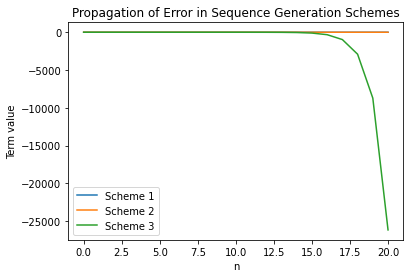

In [7]:
# Function for the first scheme
def scheme1(r0, n_max):
    r_values = [r0]
    for n in range(1, n_max + 1):
        r_values.append((1/3) * r_values[-1])
    return r_values

# Function for the second scheme
def scheme2(p0, p1, n_max):
    p_values = [p0, p1]
    for n in range(2, n_max + 1):
        p_values.append((4/3) * p_values[-1] - (1/3) * p_values[-2])
    return p_values

# Function for the third scheme
def scheme3(q0, q1, n_max):
    q_values = [q0, q1]
    for n in range(2, n_max + 1):
        q_values.append((10/3) * q_values[-1] - q_values[-2])
    return q_values

# Initial conditions with introduced errors
r0_error = 0.00004
p1_error = 0.00002
q1_error = 0.00002

# Generate sequences for each scheme
n_max = 20
r_sequence = scheme1(1 - r0_error, n_max)
p_sequence = scheme2(1, 1/3 - p1_error, n_max)
q_sequence = scheme3(1, 1/3 - q1_error, n_max)

# Plot the sequences
plt.plot(range(n_max + 1), r_sequence, label='Scheme 1')
plt.plot(range(n_max + 1), p_sequence, label='Scheme 2')
plt.plot(range(n_max + 1), q_sequence, label='Scheme 3')

plt.xlabel('n')
plt.ylabel('Term value')
plt.title('Propagation of Error in Sequence Generation Schemes')
plt.legend()
plt.show()
